## Import library

In [1]:
#Import semua library
import pm4py
import pandas as pd
import xml.etree.ElementTree as ET
from datetime import datetime as dt

## Data

In [2]:
# Baca data dari file CSV menggunakan pandas
csv_file_path = '~/Downloads/running-example.csv'
data = pd.read_csv(csv_file_path, sep=';')

In [3]:
# Tampilkan data file CSV, 10 data teratas
data.head(10)

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


In [4]:
#Menampilkan type data dari tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   case_id    42 non-null     int64 
 1   activity   42 non-null     object
 2   timestamp  42 non-null     object
 3   costs      42 non-null     int64 
 4   resource   42 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


## Menghilangkan Timezone

In [5]:
#Menghilangkan timezone
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.tz_convert(None)

In [6]:
# Tampilkan data file CSV, 10 data teratas
data.head(10)

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 13:32:00,50,Pete
1,3,examine casually,2010-12-30 14:06:00,400,Mike
2,3,check ticket,2010-12-30 15:34:00,100,Ellen
3,3,decide,2011-01-06 08:18:00,200,Sara
4,3,reinitiate request,2011-01-06 11:18:00,200,Sara
5,3,examine thoroughly,2011-01-06 12:06:00,400,Sean
6,3,check ticket,2011-01-08 10:43:00,100,Pete
7,3,decide,2011-01-09 08:55:00,200,Sara
8,3,pay compensation,2011-01-15 09:45:00,200,Ellen
9,2,register request,2010-12-30 10:32:00,50,Mike


In [7]:
#Menampilkan type data dari tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   case_id    42 non-null     int64         
 1   activity   42 non-null     object        
 2   timestamp  42 non-null     datetime64[ns]
 3   costs      42 non-null     int64         
 4   resource   42 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.8+ KB


## CSV File

In [8]:
def import_csv(file_path):
    num_events = len(file_path)
    num_cases = len(file_path.case_id.unique())
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

import_csv(data)

Number of events: 42
Number of cases: 6


In [9]:
def import_csv(file_path):
    event_log_csv = pm4py.format_dataframe(data, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    start_activities = pm4py.get_start_activities(event_log_csv)
    end_activities = pm4py.get_end_activities(event_log_csv)
    print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

import_csv(data)

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


In [10]:
# Menyimpan event log data (data, case_id='case_id', activity_key='activity', timestamp_key='timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')
event_log_csv = pm4py.format_dataframe(data, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
#event_log_csv = pm4py.format_dataframe(data)
event_log_csv.to_csv('~/Downloads/running-example-exported.csv')
# Memanggil 
csv_exported_file_path = '~/Downloads/running-example-exported.csv'
data_exported = pd.read_csv(csv_exported_file_path)
# Menampilkan 5 teratas
data_exported.head(5)

,Unnamed: 0,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0


## Convert CSV to XES

In [11]:
if __name__ == "__main__":
    event_log = pm4py.format_dataframe(data, case_id='case_id',
                                           activity_key='activity', timestamp_key='timestamp')
    #event_log = pm4py.format_dataframe(data)
    pm4py.write_xes(event_log, 'running-example-exported-new.xes')

exporting log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
# Baca data dari file XES
xes_file_path = 'running-example-exported-new.xes'
event_log = pm4py.read_xes(xes_file_path)

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
# Tampilkan data file XES, 10 data teratas
event_log.head(10)

,case_id,activity,timestamp,costs,resource,concept:name,time:timestamp,@@index,@@case_index,case:concept:name
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,register request,2010-12-30 10:02:00+00:00,0,0,1
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,examine thoroughly,2010-12-31 09:06:00+00:00,1,0,1
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,check ticket,2011-01-05 14:12:00+00:00,2,0,1
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,decide,2011-01-06 10:18:00+00:00,3,0,1
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,reject request,2011-01-07 13:24:00+00:00,4,0,1
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,register request,2010-12-30 10:32:00+00:00,5,1,2
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,check ticket,2010-12-30 11:12:00+00:00,6,1,2
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,examine casually,2010-12-30 13:16:00+00:00,7,1,2
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,decide,2011-01-05 10:22:00+00:00,8,1,2
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,pay compensation,2011-01-08 11:05:00+00:00,9,1,2


Walaupun timezone diawal sudah dihilangkan, namun ketika di convert ke XES, timezone muncul kembali (+00:00)
Data type juga berupa datetime

In [14]:
#Menampilkan type data dari tiap kolom
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   case_id            42 non-null     int64              
 1   activity           42 non-null     object             
 2   timestamp          42 non-null     datetime64[ns, UTC]
 3   costs              42 non-null     int64              
 4   resource           42 non-null     object             
 5   concept:name       42 non-null     object             
 6   time:timestamp     42 non-null     datetime64[ns, UTC]
 7   @@index            42 non-null     int64              
 8   @@case_index       42 non-null     int64              
 9   case:concept:name  42 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(4), object(4)
memory usage: 3.4+ KB


## XES File

In [15]:
def start_end_xes(file_path):
    start_activities = pm4py.get_start_activities(file_path)
    end_activities = pm4py.get_end_activities(file_path)
    print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

start_end_xes(event_log)

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


In [16]:
#Melihat variasi runtutan activity pada 1 case
variants = pm4py.get_variants(event_log)
variants

{('register request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'check ticket',
  'examine casually',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'check ticket',
  'examine thoroughly',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'check ticket',
  'examine casually',
  'decide',
  'reinitiate request',
  'examine casually',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'pay compensation'): 1}

# Process Discovery

Import library yang digunakan untuk visualisasi

In [17]:
import graphviz
import pydot

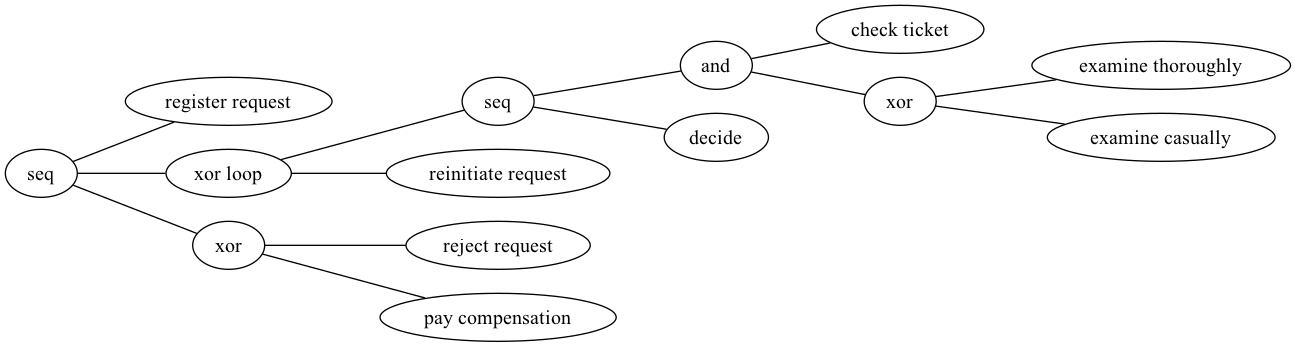

In [18]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
#pm4py.view_bpmn(bpmn_model)
pm4py.view_process_tree(process_tree)

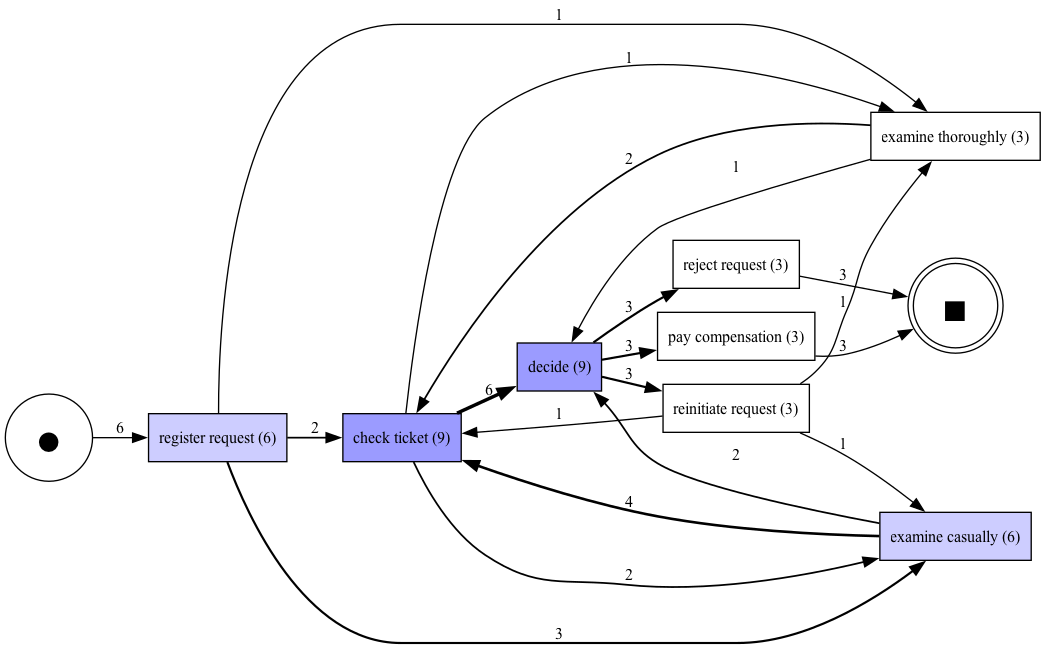

In [19]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

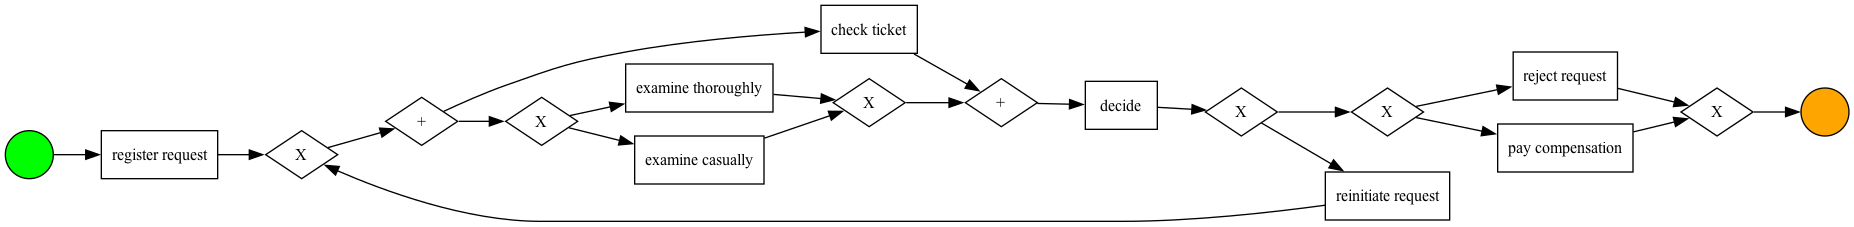

In [20]:
bpmn_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(bpmn_model)

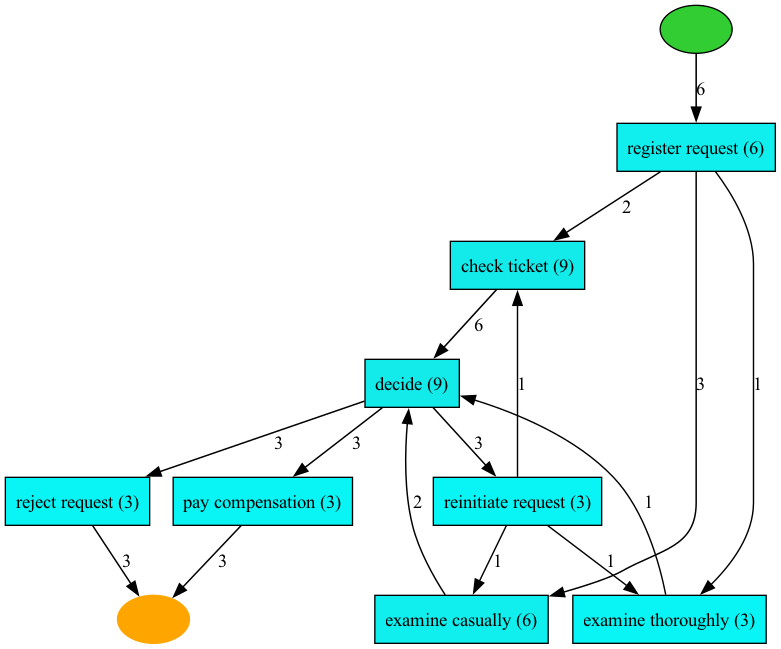

In [21]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

# Conformance Checking

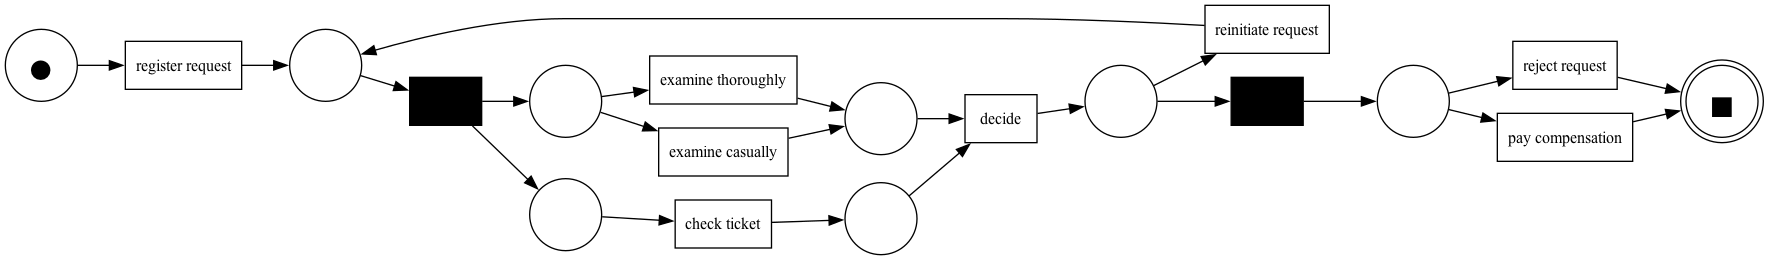

In [22]:
#Conformance Checking
#Petrinet menggunakan CSV
petri_net,im,fm = pm4py.discover_petri_net_inductive(event_log_csv)
#im: initial marking, fm:final marking
pm4py.view_petri_net(petri_net,im,fm)

In [23]:
#Confermance Checking
pm4py.fitness_token_based_replay(event_log_csv, petri_net,im,fm)

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [25]:
pn, im, fm = pm4py.convert_to_petri_net(process_tree)
pm4py.fitness_token_based_replay(event_log, pn, im, fm)

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [26]:
pm4py.fitness_alignments(event_log, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'percFitTraces': 100.0,
 'averageFitness': 1.0,
 'percentage_of_fitting_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 0.9999791670138831}

In [27]:
pm4py.conformance_diagnostics_alignments(event_log, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

[{'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('decide', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 24,
  'traversed_arcs': 24,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine casually', 'examine casually'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('reinitiate request', 'reinitiate request'),
   ('

# Filter

In [28]:
#Memfilter case yang start activity nya "register request"
#filtered = pm4py.filter_start_activities(event_log, {'register request'})

#
#filtered = pm4py.filter_start_activities(event_log, {'register request TYPO!'})

#Memfilter case yang end activity nya "pay compensation"
#filtered = pm4py.filter_end_activities(event_log, {'pay compensation'})

#Memfilter case yang memiliki satu/lebih activitynya dikerjakan (resource) oleh 'Ellen'
#filtered = pm4py.filter_event_attribute_values(event_log, 'resource', {'Ellen'})

#Memfilter activity yang dilakukan oleh 'Pete' atau 'Mike'
filtered = pm4py.filter_event_attribute_values(event_log, 'resource', {'Pete'}, level='event')

#
#filtered = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'1'})

#
#filtered = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'3', '4'}, retain=False)

#
#filtered = pm4py.filter_variants(event_log, [
        #['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']])

#tidak bisa terbaca
#filtered = pm4py.filter_variants(event_log, [['register request','examine thoroughly','check ticket','decide','reject request']])

#Memfilter case yang memiliki activity 'check ticket' langsung diikuti 'examine casually'
#filtered = pm4py.filter_directly_follows_relation(event_log, [('check ticket', 'examine casually')])

#Memfilter case yang memiliki activity 'check ticket' tidak langsung diikuti 'examine casually'
#filtered = pm4py.filter_eventually_follows_relation(event_log, [('examine casually', 'reject request')])

#
#filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode='events')

#
#filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                       #mode='traces_contained')

#
#filtered = pm4py.filter_time_range(log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                       #mode='traces_intersecting')

#lainnya ttg filter: https://pm4py.fit.fraunhofer.de/documentation

In [29]:
filtered

,case_id,activity,timestamp,costs,resource,concept:name,time:timestamp,@@index,@@case_index,case:concept:name,start_timestamp
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,register request,2010-12-30 10:02:00+00:00,0,0,1,2010-12-30 10:02:00+00:00
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,reject request,2011-01-07 13:24:00+00:00,4,0,1,2011-01-07 13:24:00+00:00
10,3,register request,2010-12-30 13:32:00+00:00,50,Pete,register request,2010-12-30 13:32:00+00:00,10,2,3,2010-12-30 13:32:00+00:00
16,3,check ticket,2011-01-08 10:43:00+00:00,100,Pete,check ticket,2011-01-08 10:43:00+00:00,16,2,3,2011-01-08 10:43:00+00:00
19,4,register request,2011-01-06 14:02:00+00:00,50,Pete,register request,2011-01-06 14:02:00+00:00,19,3,4,2011-01-06 14:02:00+00:00
26,5,check ticket,2011-01-08 10:22:00+00:00,100,Pete,check ticket,2011-01-08 10:22:00+00:00,26,4,5,2011-01-08 10:22:00+00:00
34,5,check ticket,2011-01-21 10:34:00+00:00,100,Pete,check ticket,2011-01-21 10:34:00+00:00,34,4,5,2011-01-21 10:34:00+00:00


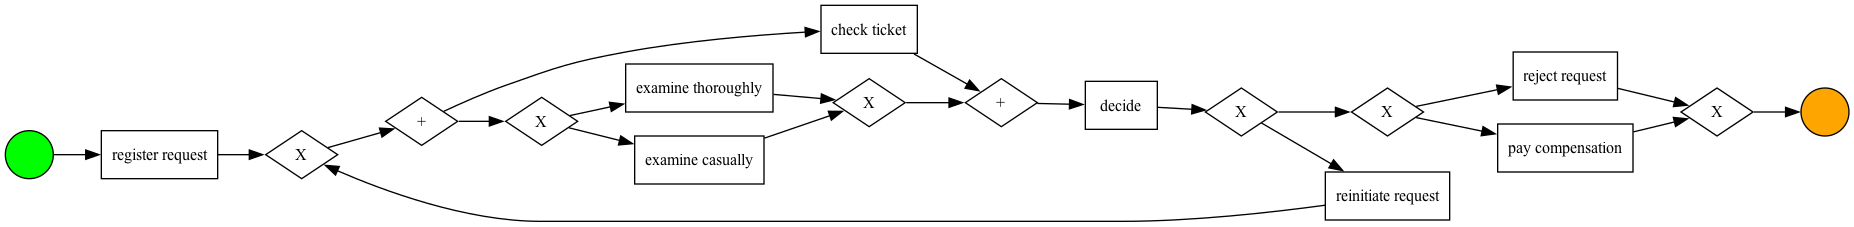

In [30]:
bpmn_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(bpmn_model)

In [31]:
#Menampilkan start dan end activity oleh 'Pete'
filtered_pete = pm4py.filter_event_attribute_values(event_log, 'resource', {'Pete'}, level='event')
start_end_xes(filtered_pete)

Start activities: {'register request': 3, 'check ticket': 1}
End activities: {'reject request': 1, 'check ticket': 2, 'register request': 1}


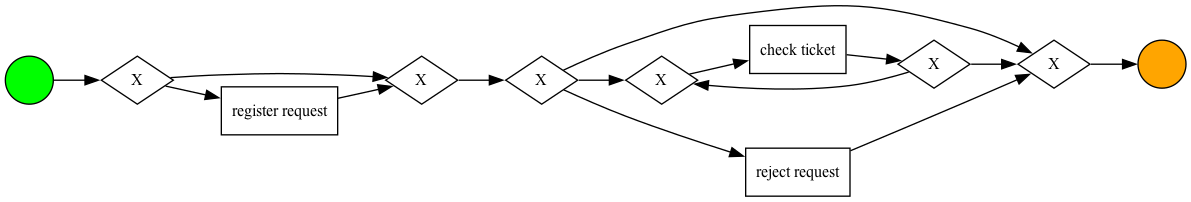

In [32]:
#Menampilkan activity dari semua case yang dilakukan oleh 'Pete'
bpmn_model_pete = pm4py.discover_bpmn_inductive(filtered_pete)
pm4py.view_bpmn(bpmn_model_pete)

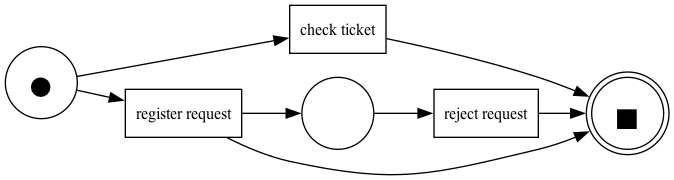

In [33]:
#Menampilkan activity dari semua case yang dilakukan oleh 'Pete'
#Menampilkan menggunakan ALPHA MINER
net_alpha, initial_marking, final_marking = pm4py.discover_petri_net_alpha(filtered_pete)
pm4py.view_petri_net(net_alpha, initial_marking, final_marking)

In [34]:
#ALPHA MINER (TOKEN BASED CONFERMANCE CHECKING)
replayed_traces_alpha = pm4py.conformance_diagnostics_token_based_replay(filtered_pete, net_alpha, initial_marking, final_marking)
replayed_traces_alpha
#Fitness < 1 sehingga kurang direkomendasikan

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

[{'trace_is_fit': False,
  'trace_fitness': 0.875,
  'activated_transitions': [(register request, 'register request'),
   (reject request, 'reject request')],
  'reached_marking': ['end:2'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 3,
  'remaining_tokens': 1,
  'produced_tokens': 4},
 {'trace_is_fit': False,
  'trace_fitness': 0.5833333333333334,
  'activated_transitions': [(register request, 'register request'),
   (check ticket, 'check ticket')],
  'reached_marking': ["({'register request'}, {'reject request'}):1", 'end:2'],
  'enabled_transitions_in_marking': {(reject request, 'reject request')},
  'transitions_with_problems': [(check ticket, 'check ticket')],
  'missing_tokens': 1,
  'consumed_tokens': 3,
  'remaining_tokens': 2,
  'produced_tokens': 4},
 {'trace_is_fit': False,
  'trace_fitness': 0.8333333333333334,
  'activated_transitions': [(register request, 'register request')],
  'reached_markin

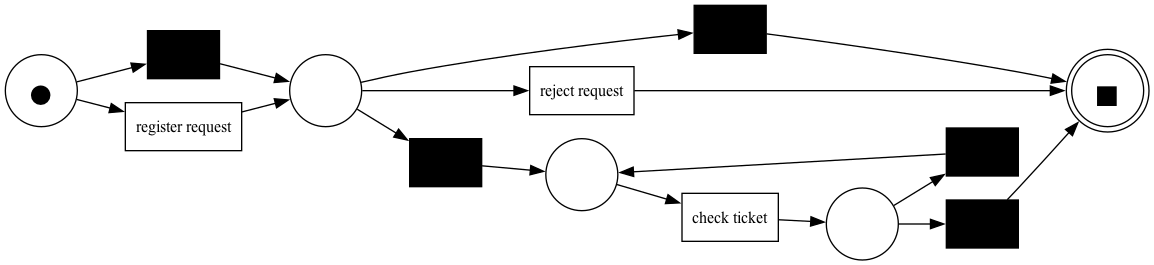

In [35]:
#Menampilkan activity dari semua case yang dilakukan oleh 'Pete'
#Menampilkan menggunakan INDUCTIVE MINER
net_inductive, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filtered_pete)
pm4py.view_petri_net(net_inductive, initial_marking, final_marking)

In [36]:
#INDUCTIVE MINER (TOKEN BASED CONFERMANCE CHECKING)
replayed_traces_inductive = pm4py.conformance_diagnostics_token_based_replay(filtered_pete, net_inductive, initial_marking, final_marking)
replayed_traces_inductive
#Fitness = 1 OKE

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(dc834963-8147-4145-a998-c56cea87b604, 'register request'),
   (6936a62f-5337-424a-829d-846680b5080f, 'reject request')],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 3,
  'remaining_tokens': 0,
  'produced_tokens': 3},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(dc834963-8147-4145-a998-c56cea87b604, 'register request'),
   (init_loop_3, None),
   (c8ae2536-5572-4453-b96f-ff50631e789a, 'check ticket'),
   (skip_6, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 5,
  'remaining_tokens': 0,
  'produced_tokens': 5},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(dc834963-8147-4145-a998-c56cea87b604, 'register request'),
   (skip_2,

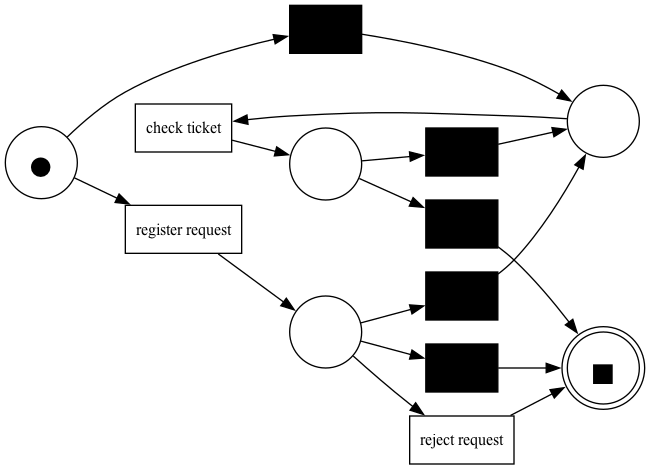

In [37]:
#Menampilkan activity dari semua case yang dilakukan oleh 'Pete'
#Menampilkan menggunakan HEURISTIC MINER
net_heuristic, initial_marking, final_marking = pm4py.discover_petri_net_heuristics(filtered_pete)
pm4py.view_petri_net(net_heuristic, initial_marking, final_marking)

In [38]:
#HEURISTIC MINER (TOKEN BASED CONFERMANCE CHECKING)
replayed_traces_heuristic = pm4py.conformance_diagnostics_token_based_replay(filtered_pete, net_heuristic, initial_marking, final_marking)
replayed_traces_heuristic
#Fitness = 1 OKE

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(register request, 'register request'),
   (reject request, 'reject request')],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 3,
  'remaining_tokens': 0,
  'produced_tokens': 3},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(register request, 'register request'),
   (hid_6, None),
   (check ticket, 'check ticket'),
   (hid_5, None)],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 5,
  'remaining_tokens': 0,
  'produced_tokens': 5},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(register request, 'register request'),
   (hid_8, None)],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_proble